In [17]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [18]:


import pandas as pd

# Load the Iris dataset from CSV file
df = pd.read_csv("C:\\2025 COHORT FEB\\AI For Software Engineering\\Week__3\\Task_1\\Iris.csv")
print(df.head())



   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [19]:
# 2. Drop the 'Id' column (not needed for prediction)
df = df.drop('Id', axis=1)

In [20]:
# 3. Handle missing values in features
from sklearn.impute import SimpleImputer

features = df.drop('Species', axis=1)
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)
X = pd.DataFrame(features_imputed, columns=features.columns)



In [21]:
from sklearn.preprocessing import LabelEncoder

# 4. Encode the species labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Species'])  # Encoded as 0, 1, 2

In [22]:
# 5. Split dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



In [23]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [24]:

# 7. Make predictions
y_pred = clf.predict(X_test)

Decision Tree Classifier Results:
Accuracy : 0.933
Precision: 0.933
Recall   : 0.933


C:\Users\Asanda Mthembu\AppData\Local\Temp\ipykernel_9960\1424156105.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis')


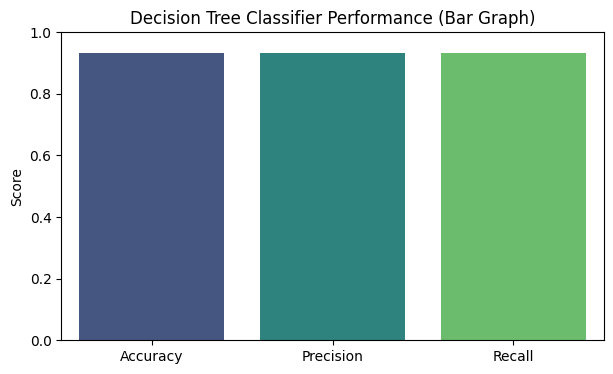

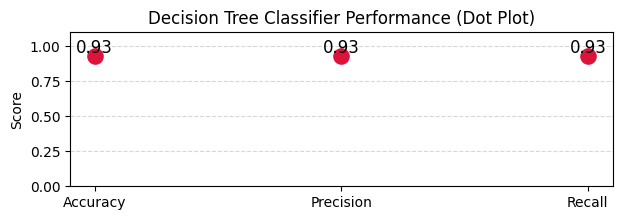

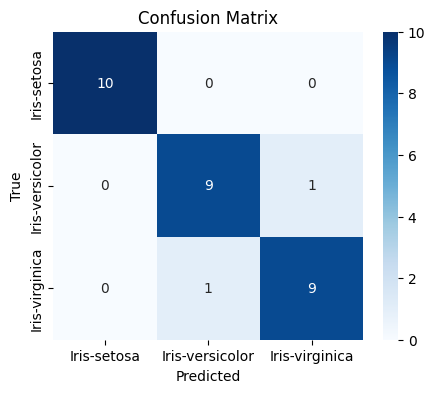

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


#  Evaluate using accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("Decision Tree Classifier Results:")
print(f"Accuracy : {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall   : {recall:.3f}")

#Bar graph visualization
metrics = ['Accuracy', 'Precision', 'Recall']
values = [accuracy, precision, recall]

plt.figure(figsize=(7,4))
sns.barplot(x=metrics, y=values, palette='viridis')
plt.ylim(0, 1)
plt.title("Decision Tree Classifier Performance (Bar Graph)")
plt.ylabel("Score")
plt.show()

#  Dot plot visualization
plt.figure(figsize=(7,2))
plt.scatter(metrics, values, color='crimson', s=120)
for i, v in enumerate(values):
    plt.text(i, v+0.02, f"{v:.2f}", ha='center', fontsize=12, color='black')
plt.ylim(0, 1.1)
plt.title("Decision Tree Classifier Performance (Dot Plot)")
plt.ylabel("Score")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
    